# Eigenmodes

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import h5py

def filter_sort_eig(eigvals, eigfuns):
    # Filter the slow-decaying modes (these are usually the non-spurious ones)
    idx_filtered = np.abs(np.imag(eigvals)) > 0.5*np.abs(np.real(eigvals))
    eigvals = eigvals[idx_filtered]
    eigfuns = eigfuns[:, idx_filtered]
    # Sort by real part, and then by imaginary part
    idx_sorted = sorted(list(range(eigvals.size)), key=lambda i: (-np.real(eigvals[i]), np.abs(np.imag(eigvals[i]))))
    eigvals = eigvals[idx_sorted]
    eigfuns = eigfuns[:, idx_sorted]
    return eigvals, eigfuns

## Plot eigenmodes - FEM

In [135]:
with h5py.File("./output/eigenmodes_n50_v2.h5", 'r') as f:
    xcoord = f["nodes"][()]
    eigvals = f["eigenvals"][()]
    eigfuns = f["eigenfuns"][()]

In [124]:
idx_filtered = np.abs(np.imag(eigvals)/np.real(eigvals)) > .5
eigvals = eigvals[idx_filtered]
eigfuns = eigfuns[:, idx_filtered]

In [125]:
idx_argsort = np.argsort(np.abs(np.imag(eigvals)))
eigvals = eigvals[idx_argsort]
eigfuns = eigfuns[:, idx_argsort]

In [136]:
eigvals

array([-7.48740345e+01 +0.j        , -7.44693484e+01 +0.j        ,
       -7.37896390e+01 +0.j        , -7.28422843e+01 +0.j        ,
       -7.16389189e+01 +0.j        , -7.01941441e+01 +0.j        ,
       -6.85247956e+01 +0.j        , -6.66492541e+01 +0.j        ,
       -6.45867527e+01 +0.j        , -6.23566895e+01 +0.j        ,
       -5.99779510e+01 +0.j        , -5.74682507e+01 +0.j        ,
       -5.48434690e+01 +0.j        , -5.21169618e+01 +0.j        ,
       -4.92987694e+01 +0.j        , -4.63946002e+01 +0.j        ,
       -4.34043455e+01 +0.j        , -4.03196242e+01 +0.j        ,
       -3.71192237e+01 +0.j        , -3.37594715e+01 +0.j        ,
       -3.01501200e+01 +0.j        , -2.60746910e+01 +0.j        ,
       -2.06948714e+01 +0.j        , -1.64369366e+01-11.69719646j,
       -1.64369366e+01+11.69719646j, -1.64284935e+01+10.02887103j,
       -1.64284935e+01-10.02887103j, -1.63744657e+01+13.25616349j,
       -1.63744657e+01-13.25616349j, -1.63136369e+01 -8.194934

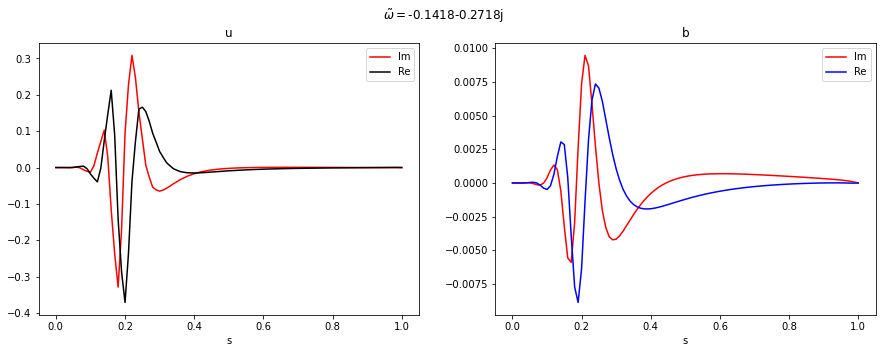

In [134]:
idx = 15

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax = axes[0]
ax.plot(xcoord, np.imag(eigfuns[0::2, idx]), 'r-', label="Im")
ax.plot(xcoord, np.real(eigfuns[0::2, idx]), 'k-', label="Re")
ax.legend()
ax.set_xlabel("s")
ax.set_title("u")

ax = axes[1]
ax.plot(xcoord, np.imag(eigfuns[1::2, idx]), 'r-', label="Im")
ax.plot(xcoord, np.real(eigfuns[1::2, idx]), 'b-', label="Re")
ax.legend()
ax.set_xlabel("s")
ax.set_title("b")

fig.suptitle(r"$\tilde{\omega}=$" + "{:.4f}".format(eigvals[idx]))

plt.show()

## Plot eigenmodes - Spectral

In [34]:
import scipy.special as specfun
from spectral import basis

with h5py.File("./output/eigenmodes_Pm0_cheby1000.h5", 'r') as f:
    degrees = f["degrees"][()]
    eigvals = f["eigenvals"][()]
    eigfuns = f["eigenfuns"][()]

In [35]:
eigvals, eigfuns = filter_sort_eig(eigvals, eigfuns)
eigvals[:50]

array([-0.01679285-0.68673023j, -0.01679285+0.68673023j,
       -0.07752257-0.83286524j, -0.07752257+0.83286524j,
       -0.14995927-1.03676172j, -0.14995927+1.03676172j,
       -0.22894482-1.27398326j, -0.22894482+1.27398326j,
       -0.31257004-1.53162231j, -0.31257004+1.53162231j,
       -0.40071697-1.802476j  , -0.40071697+1.802476j  ,
       -0.49381214-2.08244571j, -0.49381214+2.08244571j,
       -0.59244411+2.36912534j, -0.59244411-2.36912534j,
       -0.69721609+2.66115774j, -0.69721609-2.66115774j,
       -0.80859314-2.95789752j, -0.80859314+2.95789752j,
       -0.92676951-3.25912333j, -0.92676951+3.25912333j,
       -1.05165098-3.56476231j, -1.05165098+3.56476231j,
       -1.18295739-3.87470373j, -1.18295739+3.87470373j,
       -1.32035365-4.18873678j, -1.32035365+4.18873678j,
       -1.46353271+4.50657128j, -1.46353271-4.50657128j,
       -1.6122421 -4.82788517j, -1.6122421 +4.82788517j,
       -1.76629118-5.15237495j, -1.76629118+5.15237495j,
       -1.92557776+5.47975167j,

## Eigenmode plot

In [6]:
xi = np.linspace(-1, 1, num=100)
cheby_eval = basis.ChebyshevTSpace(np.arange(50), xi)

In [7]:
eigenmodes_u = np.array([cheby_eval(eigfuns[:50, i]) for i in range(74)])
eigenmodes_b = np.array([cheby_eval(eigfuns[50:, i]) for i in range(74)])

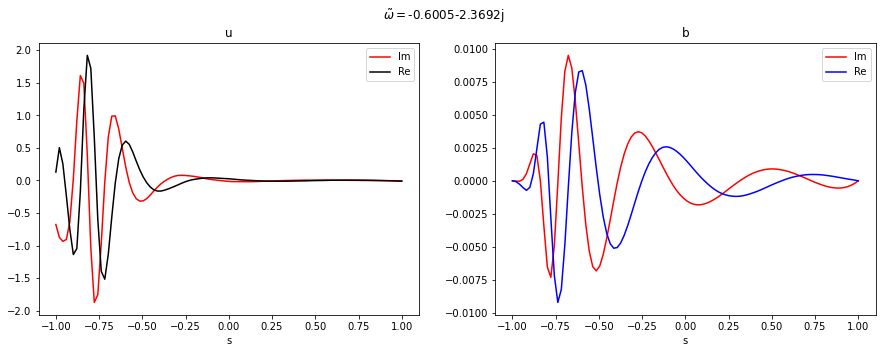

In [7]:
idx = 15

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax = axes[0]
ax.plot(xi, np.imag(eigenmodes_u[idx]), 'r-', label="Im")
ax.plot(xi, np.real(eigenmodes_u[idx]), 'k-', label="Re")
ax.legend()
ax.set_xlabel("s")
ax.set_title("u")

ax = axes[1]
ax.plot(xi, np.imag(eigenmodes_b[idx]), 'r-', label="Im")
ax.plot(xi, np.real(eigenmodes_b[idx]), 'b-', label="Re")
ax.legend()
ax.set_xlabel("s")
ax.set_title("b")

fig.suptitle(r"$\tilde{\omega}=$" + "{:.4f}".format(eigvals[idx]))

plt.show()

### Spectrum plot

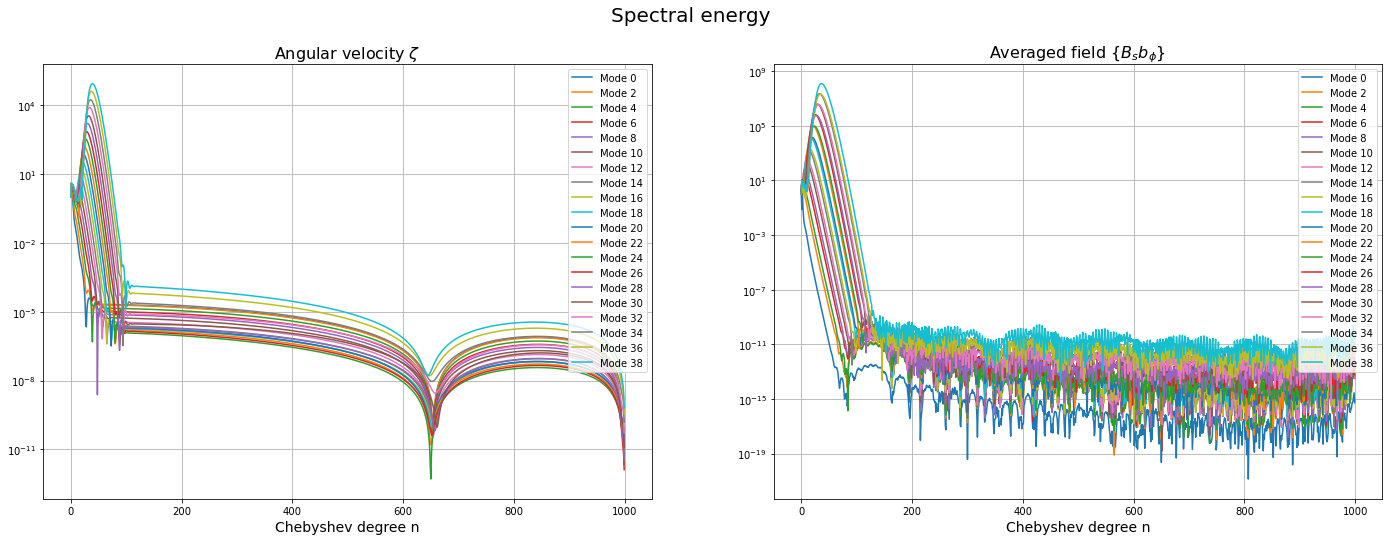

In [36]:
save_pict = True

cheby_deg = 1000
u_coeffs = eigfuns[:cheby_deg, :]
b_coeffs = eigfuns[cheby_deg:, :]

# Convert to modulus squared
u_coeffs = np.abs(u_coeffs)**2
b_coeffs = np.abs(b_coeffs)**2

# Normalize by leading Tn coefficient
u_coeffs = u_coeffs/np.abs(u_coeffs[0, :])
b_coeffs = b_coeffs/np.abs(b_coeffs[0, :])

# Normalize by maximum coefficient
# u_coeffs = u_coeffs/np.max(np.abs(u_coeffs), axis=0)
# b_coeffs = b_coeffs/np.max(np.abs(b_coeffs), axis=0)

n_modes = 20

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

ax = axes[0]
lines = ax.semilogy(np.abs(u_coeffs[:, :2*n_modes:2]))
ax.legend(lines, ("Mode {}".format(2*i) for i in range(2*n_modes)))
ax.grid(which="both")
ax.set_title(r"Angular velocity $\zeta$", fontsize=16)
ax.set_xlabel("Chebyshev degree n", fontsize=14)

ax = axes[1]
lines = ax.semilogy(np.abs(b_coeffs[:, :2*n_modes:2]))
ax.legend(lines, ("Mode {}".format(2*i) for i in range(2*n_modes)))
ax.grid(which="both")
ax.set_title(r"Averaged field $\{B_s b_\phi\}$", fontsize=16)
ax.set_xlabel("Chebyshev degree n", fontsize=14)

fig.suptitle("Spectral energy", fontsize=20)
if save_pict:
    plt.savefig("./output/eigenmodes_Pm0_cheby1000_quadpt/energy_spectrum.png", format="png", dpi=150, bbox_inches="tight")
plt.show()

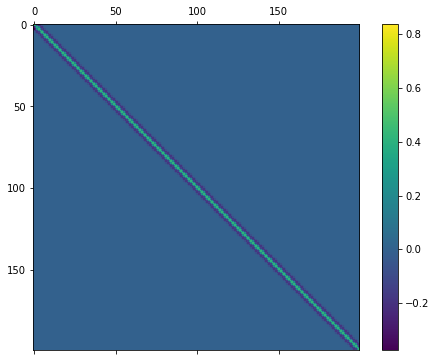

In [31]:
xi = np.linspace(-1, 1, num=200)
cheby_eval = basis.ChebyshevTSpace(np.arange(cheby_deg), xi)
ker = cheby_eval.kernel(lambda x: np.pi/2**4*(1 + x)**3*np.sqrt(3 + x), int_degree=6, jacobi_idx=(+1/2, 0))

fig, ax = plt.subplots(figsize=(8, 6))
cm = ax.matshow(ker)
# cm = ax.matshow(np.ma.array(ker, mask=np.abs(ker) < 1e-7))
plt.colorbar(cm)
plt.savefig("./output/eigenmodes_Pm0_cheby200_quadpt/energy_kernel.png", format='png', dpi=150, bbox_inches="tight")
plt.show()

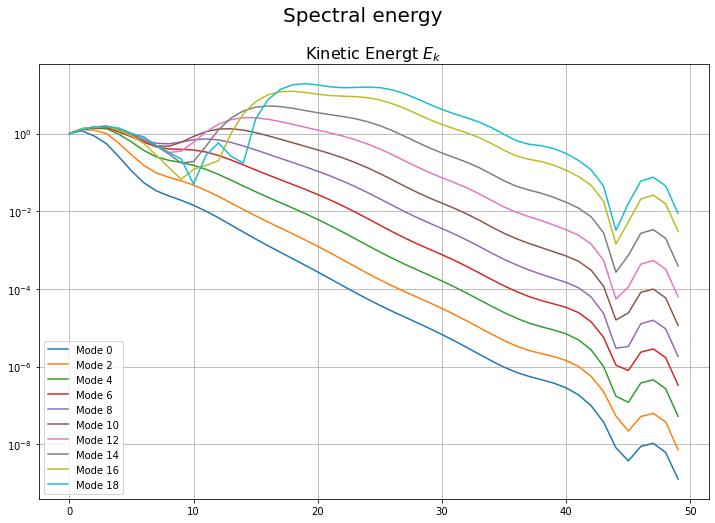

In [112]:
u_coeffs = ((np.abs(eigfuns[:50, :])**2).T*np.diag(ker)).T

# Normalize by leading Tn coefficient
u_coeffs = u_coeffs/np.abs(u_coeffs[0, :])

# Normalize by maximum coefficient
# u_coeffs = u_coeffs/np.max(np.abs(u_coeffs), axis=0)

n_modes = 10

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax = axes
lines = ax.semilogy(np.abs(u_coeffs[:, :2*n_modes:2]))
ax.legend(lines, ("Mode {}".format(2*i) for i in range(2*n_modes)))
ax.grid(which="both")
ax.set_title(r"Kinetic Energt $E_k$", fontsize=16)

fig.suptitle("Spectral energy", fontsize=20)
plt.show()

## Compare eigenmodes

In [2]:
with h5py.File("./output/eigenmodes_Pm0.h5", 'r') as f:
    eigen_0 = f["eigenvals"][()]
    eigfuns_0 = f["eigenfuns"][()]
with h5py.File("./output/eigenmodes_Pm0_sp.h5", 'r') as f:
    eigen_1 = f["eigenvals"][()]
    eigfuns_1 = f["eigenfuns"][()]
with h5py.File("./output/eigenmodes_Pm0_cheby50.h5", 'r') as f:
    eigen_2 = f["eigenvals"][()]
    eigfuns_2 = f["eigenfuns"][()]

eigen_0, eigfuns_0 = filter_sort_eig(eigen_0, eigfuns_0)
eigen_1, eigfuns_1 = filter_sort_eig(eigen_1, eigfuns_1)
eigen_2, eigfuns_2 = filter_sort_eig(eigen_2, eigfuns_2)

for i in range(50):
    print("{:.10e} {:.10e} {:.10e}".format(eigen_0[i], eigen_1[i], eigen_2[i]))

-1.6814902119e-02-6.8674455466e-01j -1.6814902119e-02-6.8674455466e-01j -1.6792836196e-02+6.8673023796e-01j
-1.6814902119e-02+6.8674455466e-01j -1.6814902119e-02+6.8674455466e-01j -1.6792836196e-02-6.8673023796e-01j
-7.7707938551e-02-8.3301073476e-01j -7.7707938551e-02-8.3301073476e-01j -7.7522793792e-02-8.3286503248e-01j
-7.7707938551e-02+8.3301073476e-01j -7.7707938551e-02+8.3301073476e-01j -7.7522793792e-02+8.3286503248e-01j
-1.5049224010e-01-1.0372156529e+00j -1.5049224010e-01-1.0372156529e+00j -1.4996108187e-01-1.0367623900e+00j
-1.5049224010e-01+1.0372156529e+00j -1.5049224010e-01+1.0372156529e+00j -1.4996108187e-01+1.0367623900e+00j
-2.2998790464e-01-1.2749351003e+00j -2.2998790464e-01-1.2749351003e+00j -2.2894237451e-01-1.2739930170e+00j
-2.2998790464e-01+1.2749351003e+00j -2.2998790464e-01+1.2749351003e+00j -2.2894237451e-01+1.2739930170e+00j
-3.1424033850e-01-1.5331757163e+00j -3.1424033850e-01-1.5331757163e+00j -3.1252743003e-01-1.5316176791e+00j
-3.1424033850e-01+1.53317571

### Spectral

In [129]:
from post_processing import eigen as eigen_post

idx_track_spec, eigenval_track_spec = eigen_post.track_eigenvalues(["./output/eigenmodes_Pm0_cheby50.h5", 
                                                                    "./output/eigenmodes_Pm0_cheby100.h5", 
                                                                    "./output/eigenmodes_Pm0_cheby200.h5", 
                                                                    "./output/eigenmodes_Pm0_cheby500.h5", 
                                                                    "./output/eigenmodes_Pm0_cheby1000.h5"], k=50)

cheby_deg = np.array([50, 100, 200, 500, 1000])
total_dof = 2*cheby_deg

C:\Users\gentle\Documents\Projects\pycrete\post_processing\eigen.py:46: UserWarning: Non-monotonic eigenvalue difference - potential non-convergence
  return min_idx, eigen_candidate
C:\Users\gentle\Documents\Projects\pycrete\post_processing\eigen.py:44: UserWarning: Large discrepancies
  self.eigen_seed = eigen_candidate


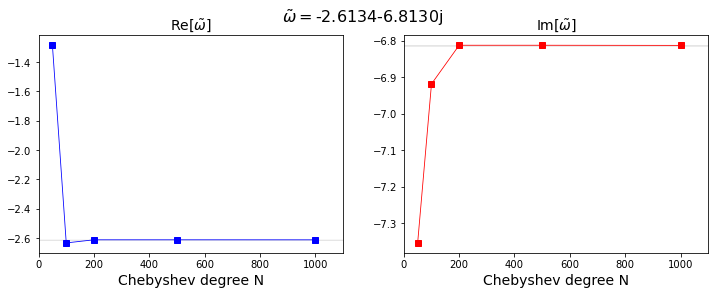

In [103]:
eig_idx = 42
single_prec_err = np.abs(eigenval_track_spec[eig_idx][-1])*1e-7

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax = axes[0]
ax.plot(cheby_deg, np.real(eigenval_track_spec[eig_idx]), 's-b', linewidth=0.8)
ax.set_title(r"Re[$\tilde{\omega}$]", fontsize=14)
ax.set_xlabel("Chebyshev degree N", fontsize=14)
ax.fill_between(np.arange(0, 1100), np.real(eigenval_track_spec[eig_idx][-1]) - single_prec_err, np.real(eigenval_track_spec[eig_idx][-1]) + single_prec_err, color="grey", alpha=0.2)
yrange = np.real(eigenval_track_spec[eig_idx]).max() - np.real(eigenval_track_spec[eig_idx]).min()
ax.set_ylim([np.real(eigenval_track_spec[eig_idx]).min() - 0.05*yrange, np.real(eigenval_track_spec[eig_idx]).max() + 0.05*yrange])
ax.set_xlim([0, 1100])

ax = axes[1]
ax.plot(cheby_deg, np.imag(eigenval_track_spec[eig_idx]), 's-r', linewidth=0.8)
ax.set_title(r"Im[$\tilde{\omega}$]", fontsize=14)
ax.set_xlabel("Chebyshev degree N", fontsize=14)
ax.fill_between(np.arange(0, 1100), np.imag(eigenval_track_spec[eig_idx][-1]) - single_prec_err, np.imag(eigenval_track_spec[eig_idx][-1]) + single_prec_err, color="grey", alpha=0.2)
yrange = np.imag(eigenval_track_spec[eig_idx]).max() - np.imag(eigenval_track_spec[eig_idx]).min()
ax.set_ylim([np.imag(eigenval_track_spec[eig_idx]).min() - 0.05*yrange, np.imag(eigenval_track_spec[eig_idx]).max() + 0.05*yrange])
ax.set_xlim([0, 1100])

fig.suptitle(r"$\tilde{\omega} = $" + "{:.4f}".format(eigenval_track_spec[eig_idx][-1]), fontsize=16)
plt.show()

### Finite-Element

In [115]:
idx_track_fem, eigenval_track_fem = eigen_post.track_eigenvalues(["./output/eigenmodes_Pm0_n50_full.h5", 
                                                                  "./output/eigenmodes_Pm0_n100_full.h5", 
                                                                  "./output/eigenmodes_Pm0_n200_full.h5", 
                                                                  "./output/eigenmodes_Pm0_n500_full.h5"], k=50)

C:\Users\gentle\Documents\Projects\pycrete\post_processing\eigen.py:46: UserWarning: Non-monotonic eigenvalue difference - potential non-convergence
  return min_idx, eigen_candidate
C:\Users\gentle\Documents\Projects\pycrete\post_processing\eigen.py:44: UserWarning: Large discrepancies
  self.eigen_seed = eigen_candidate


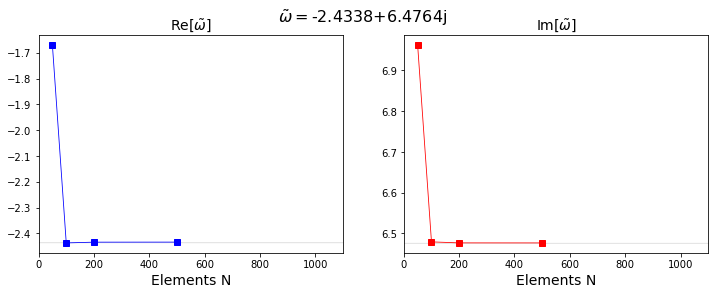

In [140]:
n_elem = np.array([50, 100, 200, 500])
total_dof_fem = 4*n_elem

eig_idx = 42
single_prec_err = np.abs(eigenval_track_fem[eig_idx][-1])*1e-7

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax = axes[0]
ax.plot(n_elem, np.real(eigenval_track_fem[eig_idx]), 's-b', linewidth=0.8)
ax.set_title(r"Re[$\tilde{\omega}$]", fontsize=14)
ax.set_xlabel("Elements N", fontsize=14)
ax.fill_between(np.arange(0, 1100), np.real(eigenval_track_fem[eig_idx][-1]) - single_prec_err, np.real(eigenval_track_fem[eig_idx][-1]) + single_prec_err, color="grey", alpha=0.2)
yrange = np.real(eigenval_track_fem[eig_idx]).max() - np.real(eigenval_track_fem[eig_idx]).min()
ax.set_ylim([np.real(eigenval_track_fem[eig_idx]).min() - 0.05*yrange, np.real(eigenval_track_fem[eig_idx]).max() + 0.05*yrange])
ax.set_xlim([0, 1100])

ax = axes[1]
ax.plot(n_elem, np.imag(eigenval_track_fem[eig_idx]), 's-r', linewidth=0.8)
ax.set_title(r"Im[$\tilde{\omega}$]", fontsize=14)
ax.set_xlabel("Elements N", fontsize=14)
ax.fill_between(np.arange(0, 1100), np.imag(eigenval_track_fem[eig_idx][-1]) - single_prec_err, np.imag(eigenval_track_fem[eig_idx][-1]) + single_prec_err, color="grey", alpha=0.2)
yrange = np.imag(eigenval_track_fem[eig_idx]).max() - np.imag(eigenval_track_fem[eig_idx]).min()
ax.set_ylim([np.imag(eigenval_track_fem[eig_idx]).min() - 0.05*yrange, np.imag(eigenval_track_fem[eig_idx]).max() + 0.05*yrange])
ax.set_xlim([0, 1100])

fig.suptitle(r"$\tilde{\omega} = $" + "{:.4f}".format(eigenval_track_fem[eig_idx][-1]), fontsize=16)
plt.show()

### Comparison

The two eigenmodes seem to be different, searching the closest mode instead
Use 49-th eigenvalue of FEM; finest FEM solution = -2.9869-7.4892j


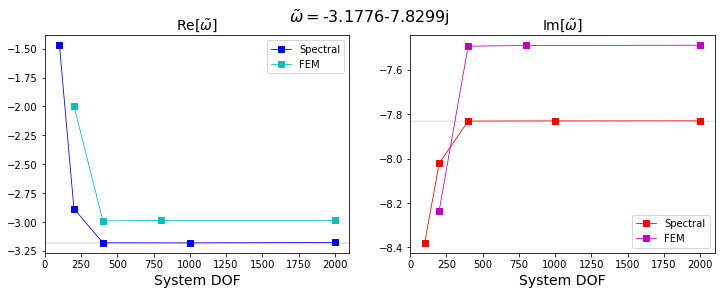

In [158]:
n_elem = np.array([50, 100, 200, 500])
total_dof_fem = 4*n_elem

eig_idx = 46
single_prec_err = np.abs(eigenval_track_fem[eig_idx][-1])*1e-7

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

spec_vals = eigenval_track_spec[eig_idx]
if np.allclose(spec_vals[-1], eigenval_track_fem[eig_idx][-1], rtol=1e-2):
    fem_vals = eigenval_track_fem[eig_idx]
elif np.allclose(np.conj(spec_vals[-1]), eigenval_track_fem[eig_idx][-1], rtol=1e-2):
    fem_vals = np.conj(eigenval_track_fem[eig_idx])
else:
    print("The two eigenmodes seem to be different, searching the closest mode instead")
    eig_idx_fem = np.argmin(np.abs(eigenval_track_fem[:, -1] - spec_vals[-1]))
    fem_vals = eigenval_track_fem[eig_idx_fem]
    print("Use {:d}-th eigenvalue of FEM; finest FEM solution = {:.4f}".format(eig_idx_fem, fem_vals[-1]))

ax = axes[0]
ax.plot(total_dof, np.real(spec_vals), 's-b', linewidth=0.8, label="Spectral")
ax.plot(total_dof_fem, np.real(fem_vals), 's-c', linewidth=0.8, label="FEM")
ax.set_title(r"Re[$\tilde{\omega}$]", fontsize=14)
ax.set_xlabel("System DOF", fontsize=14)
ax.fill_between(np.arange(0, 2100), np.real(spec_vals[-1]) - single_prec_err, np.real(spec_vals[-1]) + single_prec_err, color="grey", alpha=0.2)
yrange = [min([np.real(spec_vals).min(), np.real(fem_vals).min()]), 
          max([np.real(spec_vals).max(), np.real(fem_vals).max()])]
ax.set_xlim([0, 2100])
ax.set_ylim([yrange[0] - 0.05*(yrange[1] - yrange[0]), yrange[1] + 0.05*(yrange[1] - yrange[0])])
ax.legend()

ax = axes[1]
ax.plot(total_dof, np.imag(spec_vals), 's-r', linewidth=0.8, label="Spectral")
ax.plot(total_dof_fem, np.imag(fem_vals), 's-m', linewidth=0.8, label="FEM")
ax.set_title(r"Im[$\tilde{\omega}$]", fontsize=14)
ax.set_xlabel("System DOF", fontsize=14)
ax.fill_between(np.arange(0, 2100), np.imag(spec_vals[-1]) - single_prec_err, np.imag(spec_vals[-1]) + single_prec_err, color="grey", alpha=0.2)
yrange = [min([np.imag(spec_vals).min(), np.imag(fem_vals).min()]), 
          max([np.imag(spec_vals).max(), np.imag(fem_vals).max()])]
ax.set_xlim([0, 2100])
ax.set_ylim([yrange[0] - 0.05*(yrange[1] - yrange[0]), yrange[1] + 0.05*(yrange[1] - yrange[0])])
ax.legend()

fig.suptitle(r"$\tilde{\omega} = $" + "{:.4f}".format(spec_vals[-1]), fontsize=16)
plt.show()